# Tarea 3, Reconocimiento de Patrones

3.- Usa los algoritmos de clustering (kmeans, hclust) para entender mejor la estructura de los datos "deport.dat" de la primera tarea.

Cargamos los datos del archivo, quitando la columna del score y escalamos los datos

In [40]:
d <- read.table("heptatlon")
d.noscore <- d[-8]
d.noscore_scaled <- scale(d.noscore)
head(d.noscore_scaled, n = 3) #mejores tres
tail(d.noscore_scaled, n = 3) #peores tres

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
Joyner-Kersee (USA),-1.5611259,1.0007405,1.7979946,-2.154798,2.356750,1.1782304,-0.9098926
John (GDR),-1.3439258,0.2309401,2.0862207,-1.030574,1.175845,0.3039212,-1.1981540
Behmer (GDR),-0.8688005,0.6158403,0.7255254,-1.597843,1.112582,0.8623510,-1.4297279


,hurdles,highjump,shot,run200m,longjump,javelin,run800m
Hui-Ing (TAI),1.3710758,-1.3086606,-2.0897062,0.5990364,-1.439018,-0.6606394,0.1502818
Jeong-Mi (KOR),0.9366756,-0.9237604,-1.5333628,2.0223667,-1.375755,-0.6267951,0.3758252
Launa (PNG),3.5023521,-3.6180617,-0.8965842,1.5582372,-2.683186,1.3812958,3.3018585


Comenzamos realizando culstering jerárquico. Aquí podemos ver claramente que el desempeño de un participante en específico es muy diferente al de los demás. Viendo la tabla de datos, podemos ver que dicho participante es el que peor desempeño tuvo. Viendo los demás grupos, es importante recordar que el orden de las etiquetas no representa nada, y lo que nos importa es que tan separados están los ciertos grupos de otros. Por ejemplo, vemos que los tres participantes con mejor desempeño están muy juntos y los scores también reflejan estás similitudes, por otra parte vemos que aun que *Sablovskaite* y *Choubenkova* obtuvieron la misma puntuación, estos no están tan cercanos, lo cual es de esperarse ya que su desempeño en las pruebas no es tan similar.

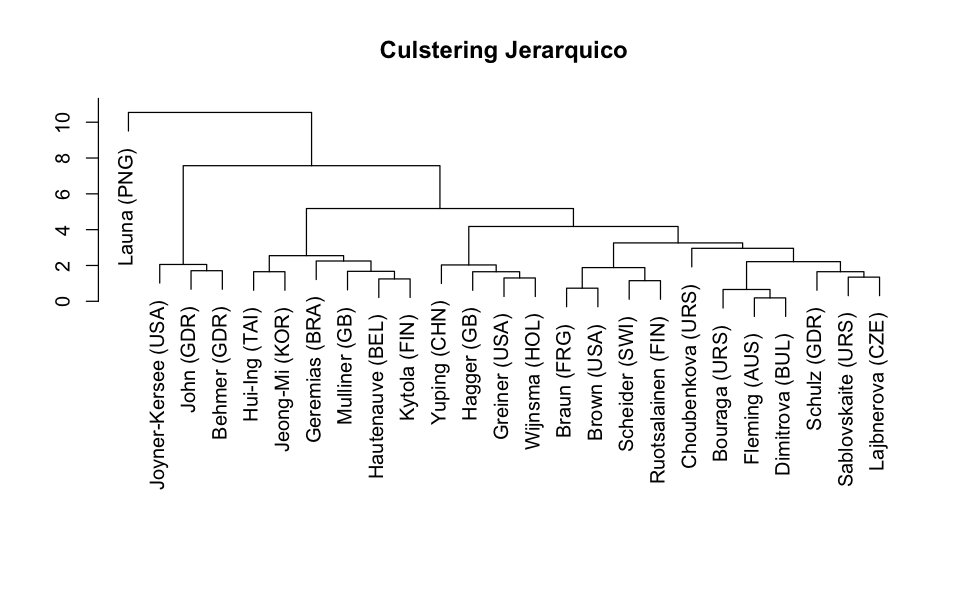

In [187]:
hc <- hclust(dist(d.noscore_scaled))
plot(hc, ylab="", xlab="", sub="", main="Culstering Jerarquico")

Tomando *hclust* como punto de partida, podemos aplicar kmeans y generar cuatro grupos, lo esperado sería tener un grupo con los participantes de mejor desempeño, seguido por otros con desempeño bueno, luego malo y al final muy malo.

In [83]:
km <- kmeans(d.noscore_scaled, 4)
km$cluster

Joyner-Kersee (USA)          John (GDR)        Behmer (GDR)  Sablovskaite (URS) 
                  4                   4                   4                   4 
  Choubenkova (URS)        Schulz (GDR)       Fleming (AUS)       Greiner (USA) 
                  4                   2                   2                   2 
   Lajbnerova (CZE)       Bouraga (URS)       Wijnsma (HOL)     Dimitrova (BUL) 
                  2                   2                   2                   2 
     Scheider (SWI)         Braun (FRG)  Ruotsalainen (FIN)        Yuping (CHN) 
                  2                   2                   2                   2 
        Hagger (GB)         Brown (USA)       Mulliner (GB)    Hautenauve (BEL) 
                  2                   2                   1                   1 
       Kytola (FIN)      Geremias (BRA)       Hui-Ing (TAI)      Jeong-Mi (KOR) 
                  1                   1                   1                   1 
        Launa (PNG) 
                  3

Despues de correr el algoritmo múltiples veces, vemos que en efecto se crearon grupos que separan bien a los participantes por su desempeño. Dada la dimensionalidad de los datos originales, podemos aplicar *PCA* sólo para poder ver los datos en *2D* en una representación que tenga sentido.

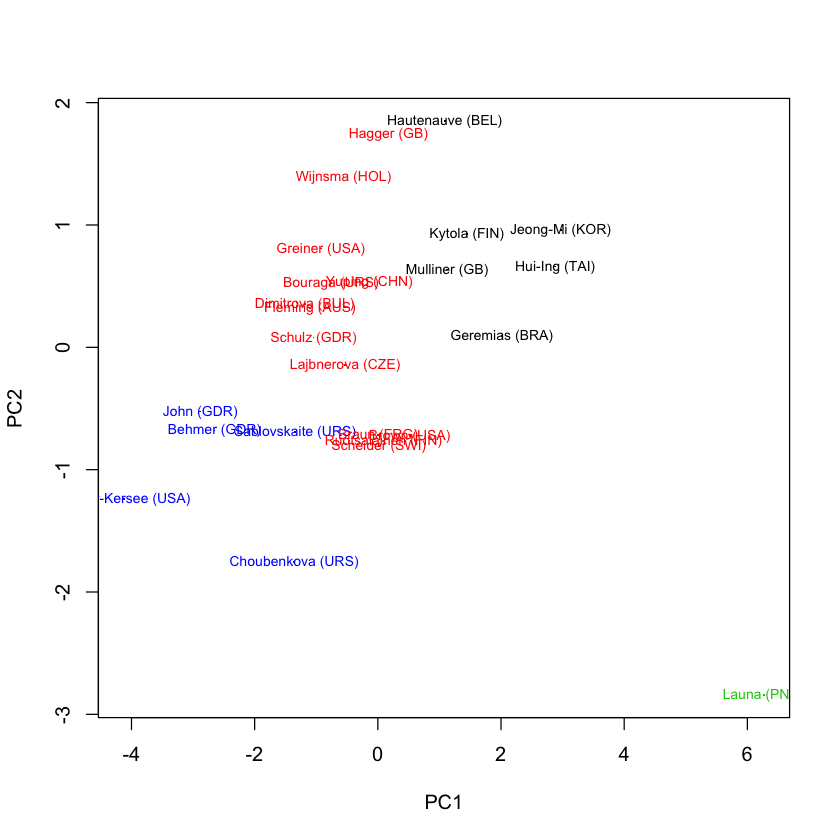

In [84]:
p <- prcomp(d.noscore_scaled)
plot(p$x[,1], p$x[,2], col = km$cluster, ylab="PC2", xlab="PC1", pch=".")
text(p$x[,1], p$x[,2], labels=rownames(p$x), cex= 0.7, col = km$cluster)

5.- Supongamos que elegimos un punto al azar del área formada por una letra C. Primero generamos un muestreo de está. Para lograr algo por el estilo tomamos la función
$$x = y^2 + \epsilon \quad \epsilon \sim \mathcal{N}(0, \frac{1}{x})$$

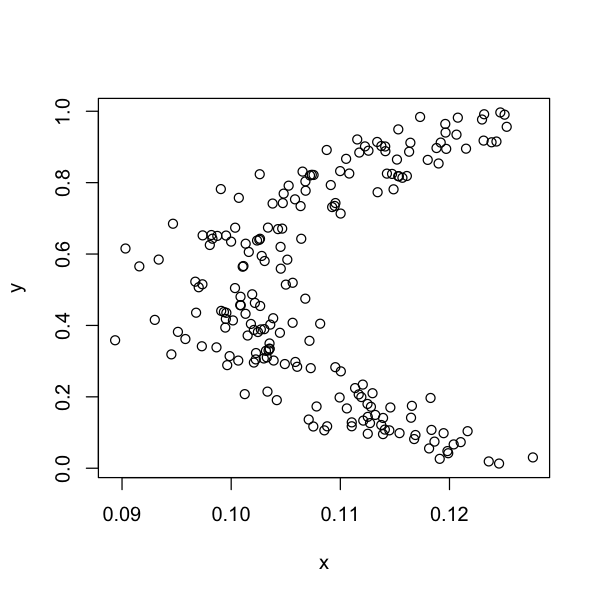

In [223]:
y <- runif(200)
x <- 0.1*(y - 0.5)^2+0.1
#Agregamos algo de ruido
x <- lapply(0.1*(y - 0.5)^2+0.1, function(x){ x + rnorm(1, sd = 0.0004/x)})
dist <- cbind(x, y)
plot(dist)

Teniendo esto podemos pasar a implementar el algoritmos EM

In [489]:
library(mvtnorm)
ndist <- function(){
    obj <- list(
        mu = cbind(runif(0.12), runif(1)),
        sigma = diag(2)
    )
    class(obj) <- append(class(obj),"Gauss2D")
    return(obj)
}

In [483]:
j_em <- function(data, k){
    params <- rep(list(ndist()), k)
}

In [484]:
k = 5
params <- rep(NA, k)

In [505]:
runif(1, max=0.1)

[1] 0.07624384

In [521]:
params <- lapply(params, function(x){list(mu=c(runif(1), runif(1)), sigma = diag(2))})

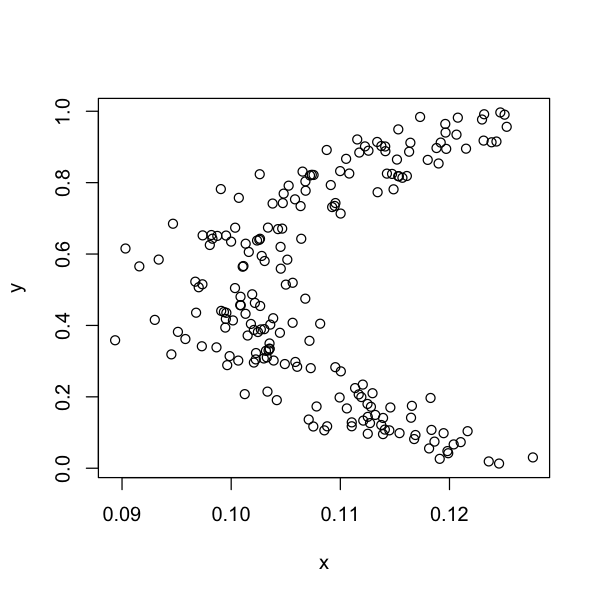

In [519]:
plot(dist)
points(params[[1]]$mu, col = 2)

In [520]:
params[[1]]

1,0
0,1


In [381]:
for (i in 1:k) { l<-c(l,ndist())}

In [449]:
s <- list(mu=c(runif(1), runif(1)), sigma = diag(2))

In [453]:
l

1,0
0,1
1,0
0,1


In [421]:
dmvnorm(as.numeric(unlist(dist[1,])), params[[1]]$mu, params[[1]]$sigma)

[1] 0.1184228